### Testing out the chi-square test of independence, t-test and Pearson correlation
We are going to use the you_off-facebook_activity file from the Facebook profile information. After transforming the data to a DataFrame of frequencies by event type, we are going to compare the distributions of event types to each other.

In [1]:
import json
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd

To read in your data, you will need the json file titled "your_off_facebook_activity". This file is usually located the the folder titled "ads_and_businesses" from the Facebook download.

In [2]:
with open(r"D:\EMAT_22110\FB Data Silva\facebook-davidsilva100046_toshare\ads_and_businesses\your_off-facebook_activity.json") as f:
    act = json.load(f)
act.keys()

dict_keys(['off_facebook_activity'])

##### List Comprehension
`apps_requests` is the resulting list of looping over each dictionary in the 'off_facebook_activity' list and selecting the value from the 'name' key.
`all_event_count` is the resulting list of looping over each dictionary in the 'off_facebook_activity' list and getting the length of the 'events' list.
The other six variables accomplish the follow task, except for different activity types:
Each dictionary in the 'off_facebook_activity' list is selected in order and given the temporary name `j`. Each element from the 'events' key is selected from j and it's 'type' is checked against a specific type. The number of True values for that type are then saved for all the apps. 

In [3]:
act['off_facebook_activity'][0]['events'][0]['type'] == 'ACTIVATE_APP'

True

In [4]:
apps_requests = [x['name'] for x in act['off_facebook_activity']]
all_event_count = [len(x['events']) for x in act['off_facebook_activity']]
activation_count = [len([x for x in j['events'] if x['type'] == 'ACTIVATE_APP']) for j in act['off_facebook_activity']]
custom_count = [len([x for x in j['events'] if x['type'] == 'CUSTOM']) for j in act['off_facebook_activity']]
search_count = [len([x for x in j['events'] if x['type'] == 'SEARCH']) for j in act['off_facebook_activity']]
view_content_count = [len([x for x in j['events'] if x['type'] == 'VIEW_CONTENT']) for j in act['off_facebook_activity']]
ad_request_count = [len([x for x in j['events'] if x['type'] == 'AD_REQUEST']) for j in act['off_facebook_activity']]
page_view_count = [len([x for x in j['events'] if x['type'] == 'PAGE_VIEW']) for j in act['off_facebook_activity']]

##### For Loop Method
This alternative method results in the exact same data as the list comprehension. However, instead of nesting two list comprehensions, the variable `i` is used to iterate over the list of app dictionaries. For each iteration of the loop, a simpler list comprehension statement is applied and the result is appended to the end of the empty lists declared in the first few lines. 

In [5]:
apps = []
events = []
actapp = []
custom = []
search = []
viewc = []
ad = []
view = []

for i in act['off_facebook_activity']:
    apps.append(i['name'])
    events.append((len(i['events'])))
    actapp.append(len([x for x in i['events'] if x['type'] == 'ACTIVATE_APP']))
    custom.append(len([x for x in i['events'] if x['type'] == 'CUSTOM']))
    search.append(len([x for x in i['events'] if x['type'] == 'SEARCH']))
    viewc.append(len([x for x in i['events'] if x['type'] == 'VIEW_CONTENT']))
    ad.append(len([x for x in i['events'] if x['type'] == 'AD_REQUEST']))
    view.append(len([x for x in i['events'] if x['type'] == 'PAGE_VIEW']))

No matter what method you use, the end result is a series of lists containing the data of interest. These can then be combined into a DataFrame. Below, I'm using a new method. The first line creates an empty DataFrame with the desired column names. The rest of the lines then assign the lists of data to those columns.

In [6]:
appbyevent = pd.DataFrame(columns = ('App', 'Event Count', 'Activate App', 'Custom', 'Search', 'View Content', 'Ad Request', 'Page Views'))
appbyevent['App'] = apps
appbyevent['Event Count'] = events
appbyevent['Activate App'] = actapp
appbyevent['Custom'] = custom
appbyevent['Search'] = search
appbyevent['View Content'] = viewc
appbyevent['Ad Request'] = ad
appbyevent['Page Views'] = view
appbyevent.head()

,App,Event Count,Activate App,Custom,Search,View Content,Ad Request,Page Views
0,U.S. Bank - Inspired by customers,18,18,0,0,0,0,0
1,"Egg, Inc.",165,109,0,0,0,35,0
2,AP News,465,133,325,0,0,7,0
3,TikTok - Make Your Day,371,99,267,5,0,0,0
4,uoregon.edu,1,0,0,0,0,0,1


Now that we have a collection of event types, we can start to look at the distributions of frequencies per event type. To do this, we could start to plot univariate distributions.

In [7]:
from scipy import stats

In [8]:
obs = np.array([appbyevent['Activate App'][:4], appbyevent['Custom'][:4]])
obs

array([[ 18, 109, 133,  99],
       [  0,   0, 325, 267]], dtype=int64)

In [9]:
stats.chi2_contingency(obs)

(242.04711361320508,
 3.434079785684188e-52,
 3,
 array([[  6.79495268,  41.14721346, 172.893796  , 138.16403785],
        [ 11.20504732,  67.85278654, 285.106204  , 227.83596215]]))

For this next analysis, we are going to narrow down our focus some to only those apps that have at least a few events of a few types.

In [10]:
sub_apps = appbyevent[['App', 'Event Count', 'Activate App', 'Custom', 'Ad Request', 'View Content', 'Page Views']].loc[appbyevent['Event Count'] > 10]
sub_apps

,App,Event Count,Activate App,Custom,Ad Request,View Content,Page Views
0,U.S. Bank - Inspired by customers,18,18,0,0,0,0
1,"Egg, Inc.",165,109,0,35,0,0
2,AP News,465,133,325,7,0,0
3,TikTok - Make Your Day,371,99,267,0,0,0
5,kent.edu,226,0,0,0,102,124
13,Slack,20,1,19,0,0,0
14,bonappetit.com,28,0,16,0,0,12
15,CondÃ© Nast,14,0,14,0,0,0
23,Microsoft Outlook: Organize Your Email & Calendar,72,72,0,0,0,0
30,"Spotify: Listen to new music, podcasts, and songs",29,29,0,0,0,0


In [11]:
sub_obs = np.array(sub_apps.drop(columns = ['App', 'Event Count']))
sub_obs

array([[ 18,   0,   0,   0,   0],
       [109,   0,  35,   0,   0],
       [133, 325,   7,   0,   0],
       [ 99, 267,   0,   0,   0],
       [  0,   0,   0, 102, 124],
       [  1,  19,   0,   0,   0],
       [  0,  16,   0,   0,  12],
       [  0,  14,   0,   0,   0],
       [ 72,   0,   0,   0,   0],
       [ 29,   0,   0,   0,   0],
       [  0,  13,   0,   3,   0],
       [  0,   0,   0,  24,  16],
       [  0,  11,   0,  16,   1],
       [  0,   0,   0,  22,  19],
       [  0,   0,   0,  12,   5],
       [  0,   0,   0,   6,   8],
       [  0,   0,   0,   0,  14],
       [  0,   6,   0,   5,   1],
       [  0,   0,   0,  14,   0],
       [  3,  15,   0,   0,   0]], dtype=int64)

In [12]:
stats.chi2_contingency(sub_obs)

(2516.890890779281,
 0.0,
 76,
 array([[  5.23308271,   7.73684211,   0.47368421,   2.30075188,
           2.2556391 ],
        [ 41.86466165,  61.89473684,   3.78947368,  18.40601504,
          18.04511278],
        [135.18796992, 199.86842105,  12.23684211,  59.43609023,
          58.27067669],
        [106.40601504, 157.31578947,   9.63157895,  46.78195489,
          45.86466165],
        [ 65.70426065,  97.14035088,   5.94736842,  28.88721805,
          28.32080201],
        [  5.81453634,   8.59649123,   0.52631579,   2.55639098,
           2.50626566],
        [  8.14035088,  12.03508772,   0.73684211,   3.57894737,
           3.50877193],
        [  4.07017544,   6.01754386,   0.36842105,   1.78947368,
           1.75438596],
        [ 20.93233083,  30.94736842,   1.89473684,   9.20300752,
           9.02255639],
        [  8.43107769,  12.46491228,   0.76315789,   3.70676692,
           3.63408521],
        [  4.65162907,   6.87719298,   0.42105263,   2.04511278,
           2.0

In [13]:
appbyevent.loc[appbyevent['App'] == "Egg, Inc."]

,App,Event Count,Activate App,Custom,Search,View Content,Ad Request,Page Views
1,"Egg, Inc.",165,109,0,0,0,35,0


In [14]:
appbyevent.loc[appbyevent['App'] == "cnn.com"]

,App,Event Count,Activate App,Custom,Search,View Content,Ad Request,Page Views
114,cnn.com,14,0,0,0,6,0,8


In [15]:
sub_apps['App']

0                      U.S. Bank - Inspired by customers
1                                              Egg, Inc.
2                                                AP News
3                                 TikTok - Make Your Day
5                                               kent.edu
13                                                 Slack
14                                        bonappetit.com
15                                           CondÃ© Nast
23     Microsoft Outlook: Organize Your Email & Calendar
30     Spotify: Listen to new music, podcasts, and songs
35                                             wiley.com
36                                       tandfonline.com
37                                           sagepub.com
43                                        brandwatch.com
94                                            newegg.com
114                                              cnn.com
221                                        mobalytics.gg
261                            

In [16]:
cats = ['app', 'app', 'app', 'app', 'site', 'app', 'site', 'unknown', 'app', 'app', 'site', 'site', 'site', 'site', 'site', 'site', 'site', 'site', 'unknown', 'app']
cats

['app',
 'app',
 'app',
 'app',
 'site',
 'app',
 'site',
 'unknown',
 'app',
 'app',
 'site',
 'site',
 'site',
 'site',
 'site',
 'site',
 'site',
 'site',
 'unknown',
 'app']

In [17]:
sub_apps['category'] = cats
sub_apps

,App,Event Count,Activate App,Custom,Ad Request,View Content,Page Views,category
0,U.S. Bank - Inspired by customers,18,18,0,0,0,0,app
1,"Egg, Inc.",165,109,0,35,0,0,app
2,AP News,465,133,325,7,0,0,app
3,TikTok - Make Your Day,371,99,267,0,0,0,app
5,kent.edu,226,0,0,0,102,124,site
13,Slack,20,1,19,0,0,0,app
14,bonappetit.com,28,0,16,0,0,12,site
15,CondÃ© Nast,14,0,14,0,0,0,unknown
23,Microsoft Outlook: Organize Your Email & Calendar,72,72,0,0,0,0,app
30,"Spotify: Listen to new music, podcasts, and songs",29,29,0,0,0,0,app


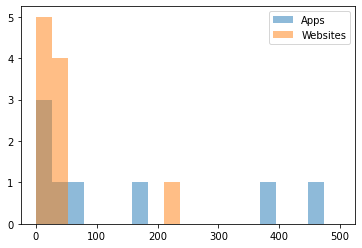

In [18]:
bins = np.linspace(0, 500, 20)
plt.hist(sub_apps['Event Count'].loc[sub_apps['category'] == 'app'], bins, alpha = 0.5, label = "Apps")
plt.hist(sub_apps['Event Count'].loc[sub_apps['category'] == 'site'], bins, alpha = 0.5, label = "Websites")
plt.legend(loc = 'upper right')
plt.show()

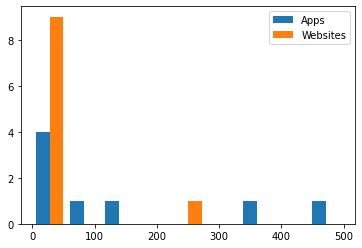

In [19]:
bins = np.linspace(0, 500, 10)
apps = sub_apps['Event Count'].loc[sub_apps['category'] == 'app']
sites = sub_apps['Event Count'].loc[sub_apps['category'] == 'site']
plt.hist([apps, sites], bins, label = ['Apps', 'Websites'])
plt.legend(loc = 'upper right')
plt.show()

In [20]:
ttest_eventcount = stats.ttest_ind(sub_apps['Event Count'].loc[sub_apps['category'] == 'app'], sub_apps['Event Count'].loc[sub_apps['category'] == 'site'])
ttest_eventcount.statistic

1.6683907283710953

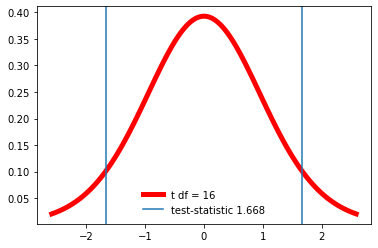

In [21]:
df1 = (len(apps) - 1) + (len(sites) - 1)
#df2 = 100
fig, ax1 = plt.subplots(1,1)
x1 = np.linspace(stats.t.ppf(0.01, df1), stats.t.ppf(0.99, df1), 100)
ax1.plot(x1, stats.t.pdf(x1, df1), 'r-', lw = 5, label = 't df = 16')
#x2 = np.linspace(stats.t.ppf(0.01, df2), stats.t.ppf(0.99, df2), 100)
#ax1.plot(x2, stats.t.pdf(x2, df2), 'k-', lw = 5, label = 't df = 100')
ax1.axvline(x=ttest_eventcount.statistic, label = 'test-statistic 1.668')
ax1.axvline(x=-ttest_eventcount.statistic, label = '_nolegend_')
ax1.legend(loc = 'best', frameon = False)
plt.show()

In [22]:
ttest_eventcount.pvalue

0.11468615477476041

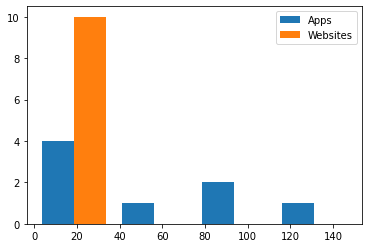

In [23]:
bins = np.linspace(0, 150, 5)
apps = sub_apps['Activate App'].loc[sub_apps['category'] == 'app']
sites = sub_apps['Activate App'].loc[sub_apps['category'] == 'site']
plt.hist([apps, sites], bins, label = ['Apps', 'Websites'])
plt.legend(loc = 'upper right')
plt.show()

In [24]:
ttest_activateapp = stats.ttest_ind(sub_apps['Activate App'].loc[sub_apps['category'] == 'app'], sub_apps['Activate App'].loc[sub_apps['category'] == 'site'])
ttest_activateapp

Ttest_indResult(statistic=3.565414232164613, pvalue=0.0025810784902644667)

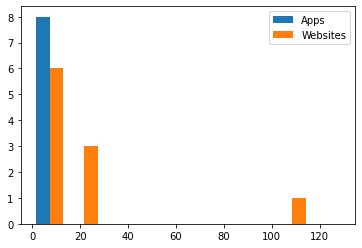

In [25]:
bins = np.linspace(0, 130, 10)
apps = sub_apps['View Content'].loc[sub_apps['category'] == 'app']
sites = sub_apps['View Content'].loc[sub_apps['category'] == 'site']
plt.hist([apps, sites], bins, label = ['Apps', 'Websites'])
plt.legend(loc = 'upper right')
plt.show()

In [26]:
ttest_viewcontent = stats.ttest_ind(sub_apps['View Content'].loc[sub_apps['category'] == 'app'], sub_apps['View Content'].loc[sub_apps['category'] == 'site'])
ttest_viewcontent

Ttest_indResult(statistic=-1.7561285258261878, pvalue=0.09818667064727682)